# Manufacturers' Value of Shipments: Total Manufacturing

Data file: https://fred.stlouisfed.org/series/UMTMVS 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [36]:
df = pd.read_csv('UMTMVS.csv',index_col='DATE',parse_dates=True)

In [38]:
df.describe

<bound method NDFrame.describe of               UMTMVS
DATE                
1992-01-01  209438.0
1992-02-01  232679.0
1992-03-01  249673.0
1992-04-01  239666.0
1992-05-01  243231.0
...              ...
2018-09-01  516992.0
2018-10-01  527031.0
2018-11-01  495901.0
2018-12-01  490076.0
2019-01-01  466791.0

[325 rows x 1 columns]>

In [37]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

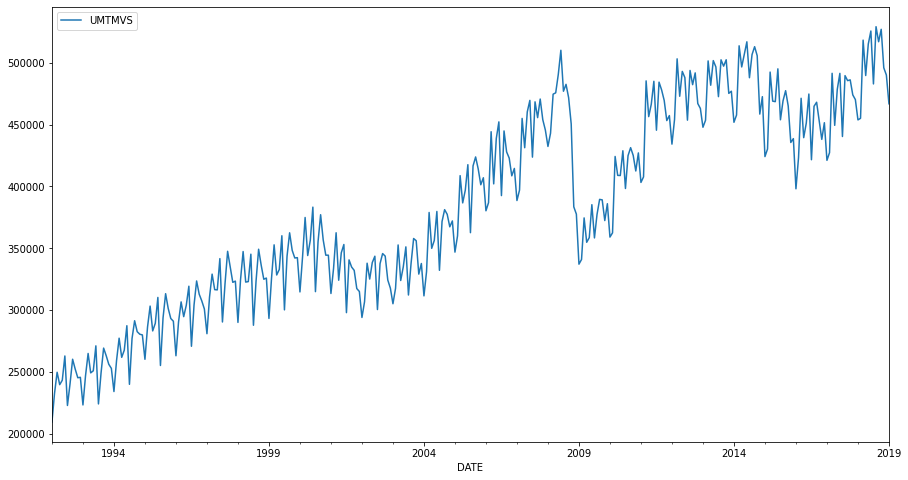

In [17]:
df.plot(figsize=(15,8));

# Calculating the percent increse from jan 2009 to jan 2019

In [18]:
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

# Calculating the percent increse from jan 2008 to jan 2009

In [19]:
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

# Jan 2009 in the month with the least value after 2005

In [20]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

# Top five months with he highest value

In [21]:
df.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


# 95206 Million dollars was lost during 2008

In [22]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

# Yearly Barplot

<AxesSubplot:xlabel='DATE'>

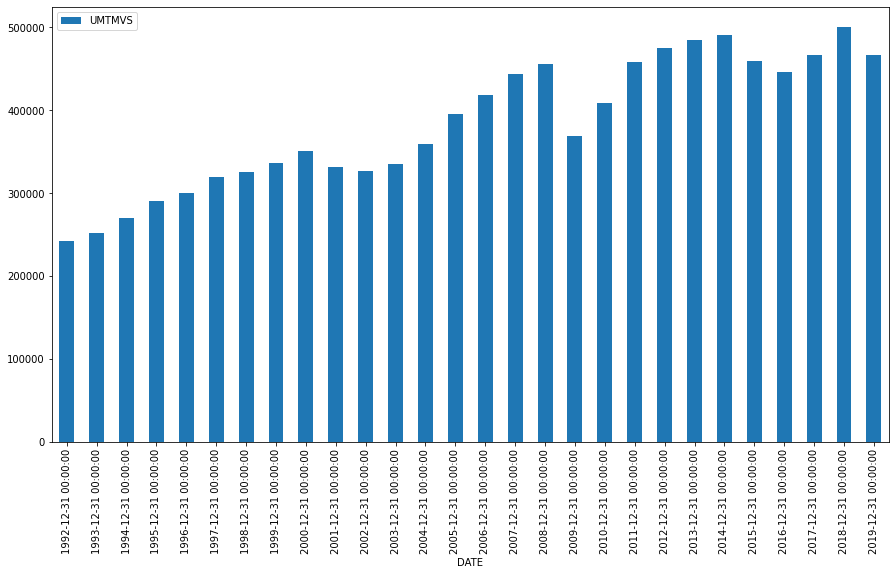

In [23]:
df.resample('Y').mean().plot.bar(figsize=(15,8))

# Which month has the biggest increase in mean value from the previous year's mean value

In [26]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

In [31]:
change=yearly_data-yearly_data_shift
change

,UMTMVS,Yearly Mean
DATE,,
1992-12-31,NaN,NaN
1993-12-31,9706.083333,5744.319444
1994-12-31,18134.583333,12330.104167
1995-12-31,20130.416667,21941.541667
1996-12-31,9792.583333,12515.430556
1997-12-31,19792.583333,15870.763889
1998-12-31,5426.166667,13264.506944
1999-12-31,11006.166667,5879.326389
2000-12-31,14724.750000,16124.902778


In [33]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

# Yearly Rolling Mean

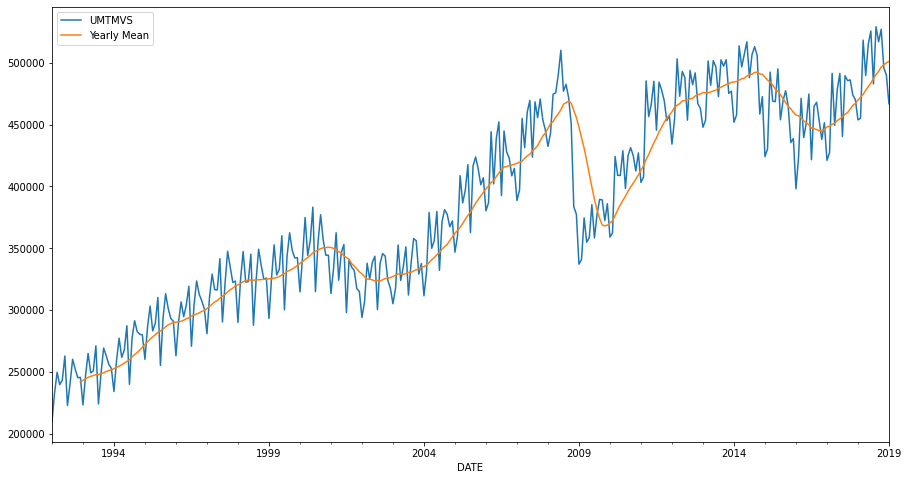

In [25]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(15,8)).autoscale(axis='x',tight=True);

# Plot for year of 2008

In [39]:
df2008 = df.loc['2008-01-01':'2009-01-01']

<AxesSubplot:xlabel='DATE'>

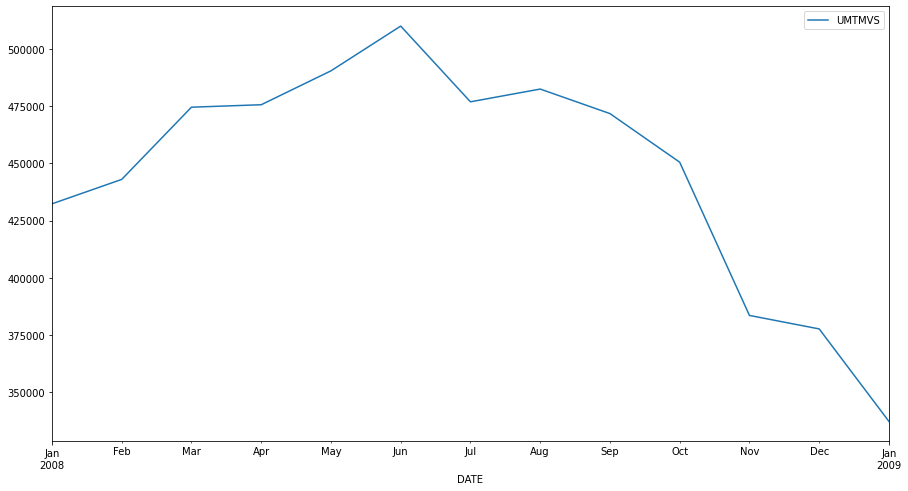

In [41]:
df2008[['UMTMVS']].plot(figsize=(15,8))

# Maximum of this year (Value and its Month)

In [45]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [43]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

# How many months it take between peak in year 2008 to the peak which surpasses this year?

In [46]:
df_next_pick=df.loc['2008-06-01':]

In [47]:
df_next_pick[df_next_pick>=510081].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


Next pick is 2014-03-01 

In [49]:
len(df.loc['2008-06-01':'2014-03-01'])

70

The answer is 70 months